In [1]:
import os

import numpy as np
from GenSnippetsLib import *
from PIL import Image, ImageDraw, ImageFont

In [2]:
def get_color(seed, n_colors):
    import random
    random.seed(seed)
    return [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for i in range(n_colors)]

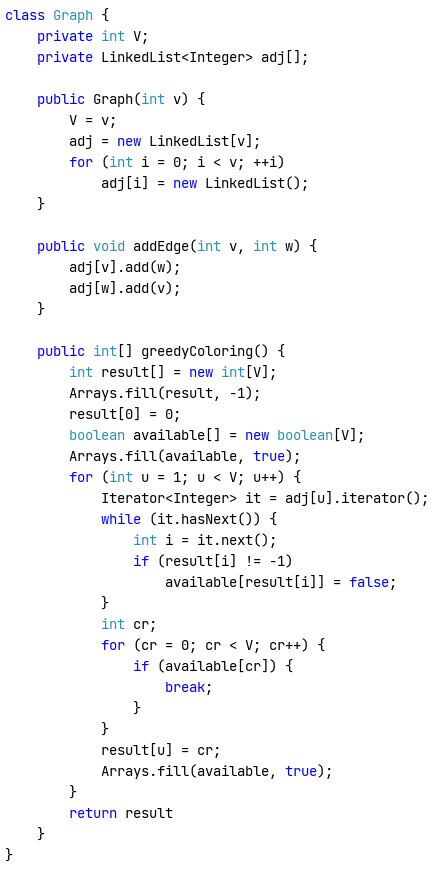

In [9]:
generator_folder = os.getcwd() + "\\CodeSnippets\\Sven\\Generators"
snippet_folder = os.getcwd() + "\\CodeSnippets\\Sven\\Snippets"

files = os.listdir(generator_folder)

for file in files:
    filename, _file_extension = os.path.splitext(file)
    img, result = create_image(generator_folder + "\\" + file, font_path="\\CodeSnippets\\fonts\\ttf\\")
    display(img)
    img.save("coloring.png")

In [51]:
img, result = create_image(os.getcwd() + "\\dataEvaluation\\test.json", font_path="\\CodeSnippets\\fonts\\ttf\\")
current_aoi = None
for idx, value in enumerate(result):
    value["BoundingBox"] = [int(x) for x in value["BoundingBox"]]
    if current_aoi is not None and value["AOI"] == current_aoi and current_aoi != "None":
        value["BoundingBox"][0] = min(value["BoundingBox"][0], result[idx-1]["BoundingBox"][0])
        value["BoundingBox"][1] = min(value["BoundingBox"][1], result[idx-1]["BoundingBox"][1])
        value["BoundingBox"][2] = max(value["BoundingBox"][2], result[idx-1]["BoundingBox"][2])
        value["BoundingBox"][3] = max(value["BoundingBox"][3], result[idx-1]["BoundingBox"][3])
        result[idx-1]["AOI"] = "None"
    else:
        current_aoi = value["AOI"]

result = [value for value in result if value["AOI"] != "None"]
unique_values = list(set([value["AOI"] for value in result]))
colors = np.array(get_color(12, len(unique_values)))
img = np.array(img)
for letter in result:
    color = colors[unique_values.index(letter["AOI"])]
    bounding_box = letter["BoundingBox"]
    bounding_box[1] -= 2
    bounding_box[3] += 2
    bounding_box = [int(value) for value in bounding_box]
    img[bounding_box[1]:bounding_box[3], bounding_box[0]:bounding_box[2], 0:3] = 0.5 * img[bounding_box[1]:bounding_box[3], bounding_box[0]:bounding_box[2], 0:3] + 0.5 * color

img = Image.fromarray(img)
img.save("./test.png")